In [69]:
from sklearn.datasets import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [18]:
diabetes = load_diabetes()

In [20]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [122]:
diabetes.feature_names

['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [22]:
diabetes.data.shape

(442, 10)

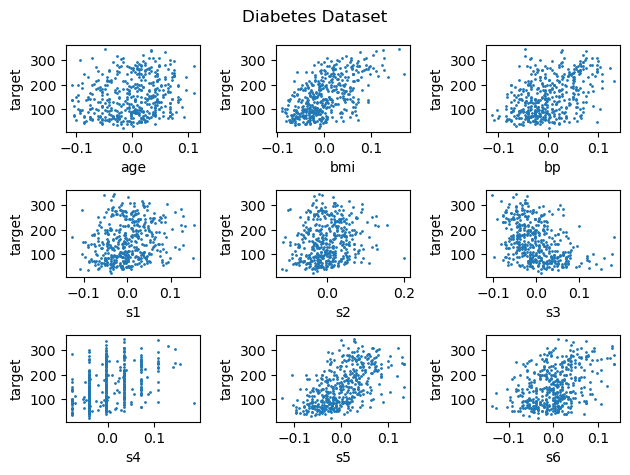

In [149]:
features = diabetes['feature_names']
fig, axs = plt.subplots(3, 3)
fig.suptitle('Diabetes Dataset')
for i in range(3):
    for j in range(3):
        n = j + i * 3
        feature = features[n]
        axs[i, j].scatter(diabetes['data'][feature], diabetes['target'], s=1)
        axs[i, j].set_xlabel(feature)
        axs[i, j].set_ylabel('target')
plt.tight_layout()
plt.show()

In [163]:
def fit(X, y, lr=0.1, bias=0):
    samples, features = X.shape
    weights = np.zeros(features)
    weights, bias = gradient_descent(X, y, weights, samples)
    return weights, bias

In [164]:
def gradient_descent(X, y, weights, samples, lr=0.1, bias=0):
    
    for i in range(1000):
        y_predict = np.dot(X, weights) + bias
        
        weights = weights - (lr * 1 / samples * np.dot(X.T, (y_predict - y)))
        bias = bias - (lr * 1 / samples * np.sum(y_predict - y))
    return weights, bias

In [165]:
def predict(X_test, weights, bias):
    return np.dot(X_test, weights) + bias

In [166]:
def calc_mae(y_pred, y):
    return np.mean(np.abs(y_pred - y)) 

In [199]:
X, y = load_diabetes(return_X_y=True)
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

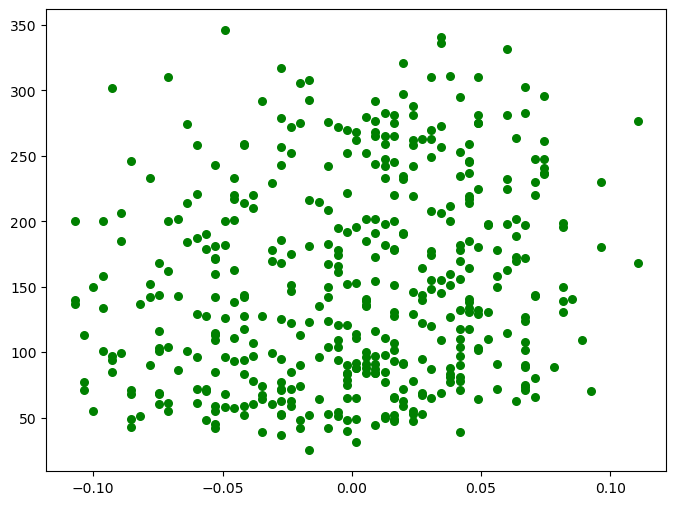

In [168]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color = "g", marker = "o", s = 30)
plt.show()

In [224]:
# X_train = X[:-20]
# X_test = X[-20:]

# y_train = y[:-20]
# y_test = y[-20:]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train.shape

(353, 10)

In [170]:
weights, bias = fit(X_train, y_train)
print('weights:', weights, 'bias:', bias)

weights: [  33.61973393  -17.57183618  163.35904663  117.87025983   38.18016908
   27.05890729 -106.18984168  106.07650772  147.71724118   96.49710572] bias: 152.7863783575932


In [171]:
y_pred = predict(X_test, weights, bias)
y_pred

array([164.30919347, 156.56686464, 120.48862892, 109.46566661,
       123.45355524, 156.82285921, 174.60088226, 134.00879588,
       135.57763405, 159.92615992, 115.84255435, 186.062024  ,
       151.5539744 , 157.65974109, 144.99223338, 161.4809433 ,
       132.10286756, 133.74501814, 210.55671715, 159.06242949,
       162.43639017, 137.14406638, 133.18310662, 197.52480643,
       179.29404957, 190.62283996, 118.59677225, 208.9889989 ,
       166.24564381, 101.66342344, 129.13503087, 141.66362826,
       130.96856651, 130.57637526, 155.59692456, 201.80535525,
       197.2460694 , 105.8791737 , 174.95923451, 120.04601892,
       157.4466213 , 135.47562892, 177.53277159, 139.39403121,
       167.55701253, 139.82215572, 131.13829835, 172.73265418,
       129.62849026, 159.69667793, 144.34427292, 157.58675312,
       173.52478984, 147.29180591, 135.16291015, 156.53336381,
       183.76691443, 151.72410047, 196.11297562, 145.8499118 ,
       112.36761477, 183.64543146, 171.73737929, 151.04

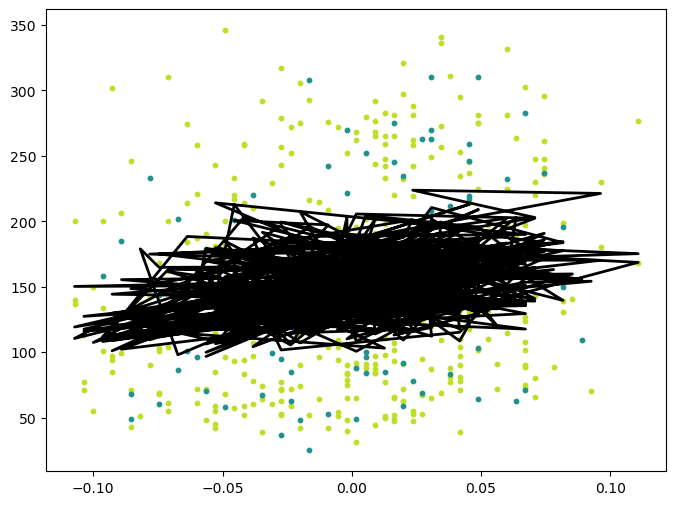

In [222]:
y_pred_line = predict(X, weights, bias)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train[:, 0], y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test[:, 0], y_test, color=cmap(0.5), s=10)
plt.plot(X[:, 0], y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()

In [172]:
calc_mae(y_pred, y_test)

51.70283861510915

In [211]:
from sklearn.linear_model import LinearRegression

In [212]:
reg = LinearRegression().fit(X_train, y_train)
reg.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [216]:
y_pred_sklearn = reg.predict(X_test)

In [217]:
from sklearn.metrics import mean_absolute_error

In [218]:
mean_absolute_error(y_pred_sklearn, y_test)

43.3853257640767

In [258]:
def norm_equ(X, y):
    X_p = np.concatenate((np.ones((353, 1)), X),axis=1)
    print(X_p[1])
    return np.linalg.inv(X_p.T.dot(X_p)).dot(X_p.T).dot(y)

In [259]:
theta = norm_equ(X_train, y_train)

[ 1.          0.04897352 -0.04464164  0.06061839 -0.02288496 -0.02358421
 -0.07271173 -0.04340085 -0.00259226  0.10413761  0.03620126]


In [260]:
theta

array([  153.47966457,   -43.45526217,  -280.55848553,   528.97893541,
         346.50018232, -1032.32970269,   661.5777617 ,   241.08637357,
         240.52992036,   798.26318387,   123.16933708])

In [262]:
y_pred = predict(X_test, theta[1:], theta[0])

In [263]:
calc_mae(y_pred, y_test)

44.242178169080816